# Data Processing Case Study

# 1 Data Processing

This case study aims to provide a complete understanding of the topics covered in this course using a real world scenario. This notebook provides the different steps of data cleaning and visualisation in a sequential manner, applying it to a real dataset. It aims to provide a consolidated approach to processing dataset for machine learning tasks.

The note book uses the following dataset:- PIMA Indian Diabetics- click [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) to download-Diabetes is one of the ailments that takes lives if not detected early and treated. Knowing and confirming the variables that contribute to this disease is one of the aims of this project. The task is to find out the variable(s) that are indicators of diabetes among women so that at tention can be paid towards those variables to reducet he chances of having diabetes.

The dataset comprises of female patients who are diabetic and a binary target variable, Outcome which takes 2 values; 0 or 1, where 0 indicates negative for diabetes and 1 indicates positive for diabetes.

## 1.1 Importing Libraries

Let us start by importing the necessary libraries and the Diabetes dataset which has been down-loaded from the link given above and saved to the present working directory.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


We have used .head() to see a glimpse about the data.

## 1.2  Data Preprocessing

As a first task, let us explore the data in more detail to understand what preprocessing steps are required for the data.  We have already used .head() above. Let us now proceed to find more information about the dataset using .describe().

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


As we can see here, the columns - Glucose, BloodPressure, SkinThickness, Insulin and BMI have a minimum value of 0 which is absurd. This suggests that missing values are being represented by 0.

Also, maximum value for pregnancies is 17 which is again absurd and is probably an outlier.

Let us deal with missing values first

### 1.2.1  Checking for missing values

Since we know missing values are being represented by 0, let us count the 0 values in each column

In [6]:
data_cols =['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(data[data_cols]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

The count of 0 values in each column have been listed above. These numbers confirm that 0 are indeed, representing missing values. Let us try what happens when we try to find the count of nullvalues in each column using .isnull().sum() which is the common method of finding missing values.

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It shows 0 null values for every column. This happens because null values in this case are not represented by the standard representation of ‘NaN’ or ‘None’. Since, here null values are represented by 0, pandas is not able to identify any null values in the dataset. Let us now replace these 0 valuesby ‘NaN’ values.

In [8]:
from numpy import nan
data[data_cols]=data[data_cols].replace(0,nan)

Let us now check the null values again in our dataset.

In [9]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

As we can see, null values are now being detected.  All 0s have been converted to null values.To replace missing values in our dataset, let us see the underlying data distribution. A normally distributed feature can have missing values replaced by its mean. For a feature known to have outliers, median is a better assumption for missing value imputation. Let us look at the data distribution for the features with missing values in the dataset.

array([[<Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>],
       [<Axes: title={'center': 'BMI'}>, <Axes: >]], dtype=object)

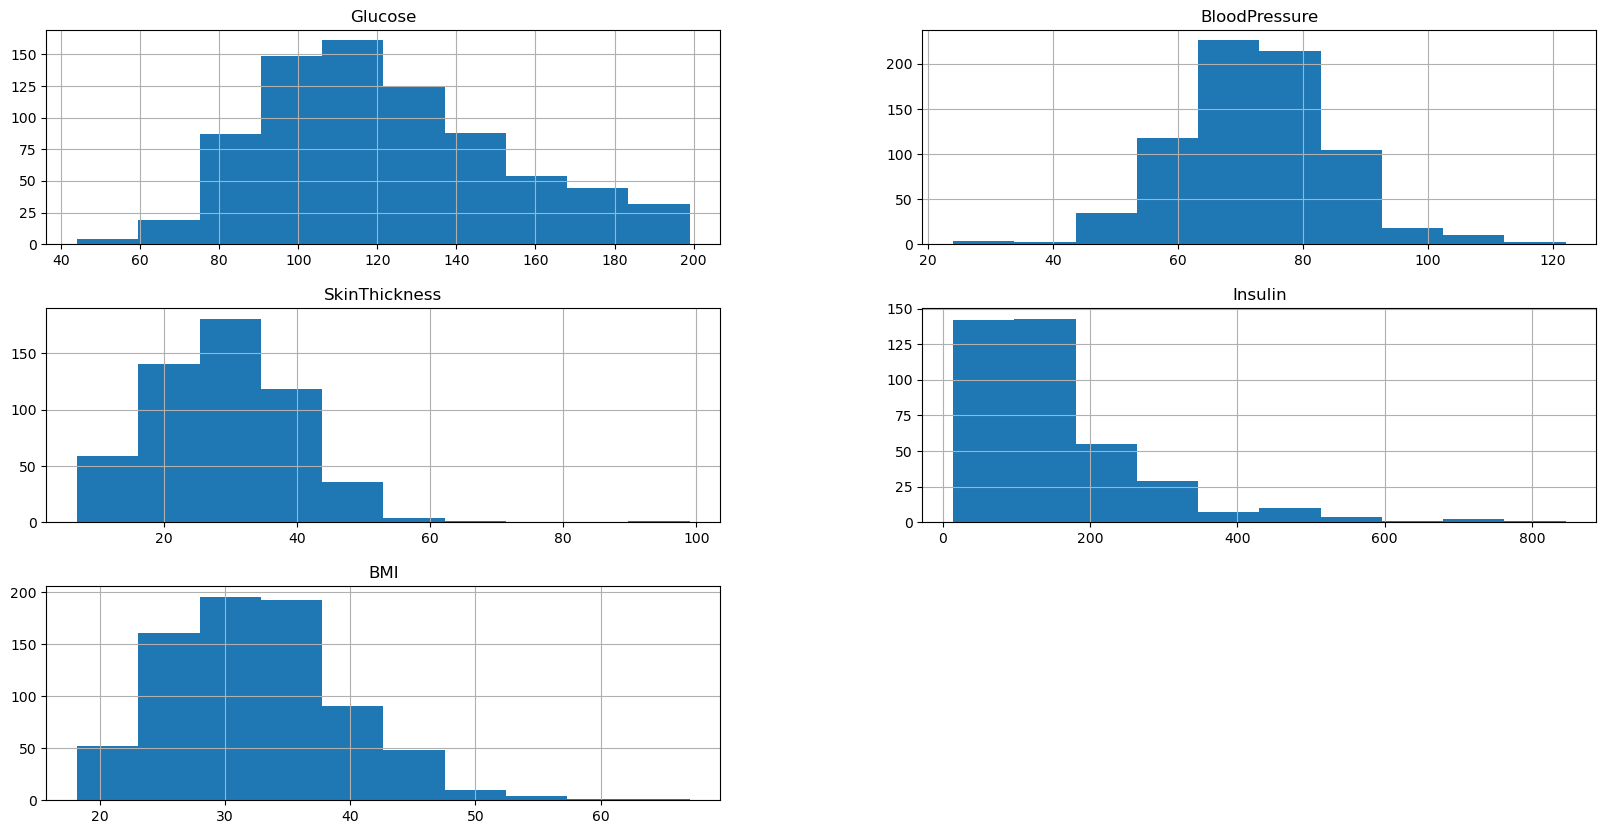

In [10]:
data[data_cols].hist(figsize=(20,10))

From these histograms, we can determine that Glucose, BloodPressure, SkinThickness and BMI columns have a roughly normal distribution but there seems to be outliers in some of the features like SkinThickness. In this case, median can be a better estimate for the missing values for all the columns. For the normally distributed columns, mean and median would have a very little difference as can be seen below.

In [11]:
mean_val=data[data_cols].mean()

In [12]:
mean_val

Glucose          121.686763
BloodPressure     72.405184
SkinThickness     29.153420
Insulin          155.548223
BMI               32.457464
dtype: float64

In [13]:
median_val=data[data_cols].median()
median_val

Glucose          117.0
BloodPressure     72.0
SkinThickness     29.0
Insulin          125.0
BMI               32.3
dtype: float64

### 1.2.2  Imputing the missing values by median

In [14]:
for col in data_cols:
    data[col].fillna(data[col].median(),inplace=True)

Check again for the presence of any missing values in the DataFrame.

In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It can be seen that data is now free of missing values.

### 1.2.3 Data type Information

let us quickly find out the data type information of each column of the DataFrame.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


While most columns have the correct data type, Outcome column can be converted to ‘category’ data type.

In [17]:
data["Outcome"]=data["Outcome"].astype("category")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(6), int64(2)
memory usage: 49.0 KB


Notice how the memory usage of the datset reduces as a result.

### 1.2.4  Data Grouping

Data can be grouped to find useful insights from the data. We can group by the ‘Outcome’ column to see how many rows we have for each class.

In [19]:
data.groupby(["Outcome"]).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


The data shows 500 observations for outcome 0 and 268 observations for outcome 1. This show sthat the data has a high class imbalance. We can also find the percentage for each type of outcome.

In [20]:
num_obs=len(data)
num_true=len(data.loc[data["Outcome"]==1])
num_false=len(data.loc[data["Outcome"]==0])
print("Number of true outcome:{0} ({1:2.2f}%)".format(num_true,(num_true/num_obs)*100))
print("Number of false outcome:{0}({1:2.2f}%)".format(num_false,(num_false/num_obs)*100))

Number of true outcome:268 (34.90%)
Number of false outcome:500(65.10%)


For an imbalanced data, model building is done diffrently as compared to a class balanced data.

## 1.3  Data Visualisation

Let us visualise the data to get more insights from the data. As a first step, we can plot the histogram for each column to see the distribution of the data.

### 1.3.1  Histogram

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

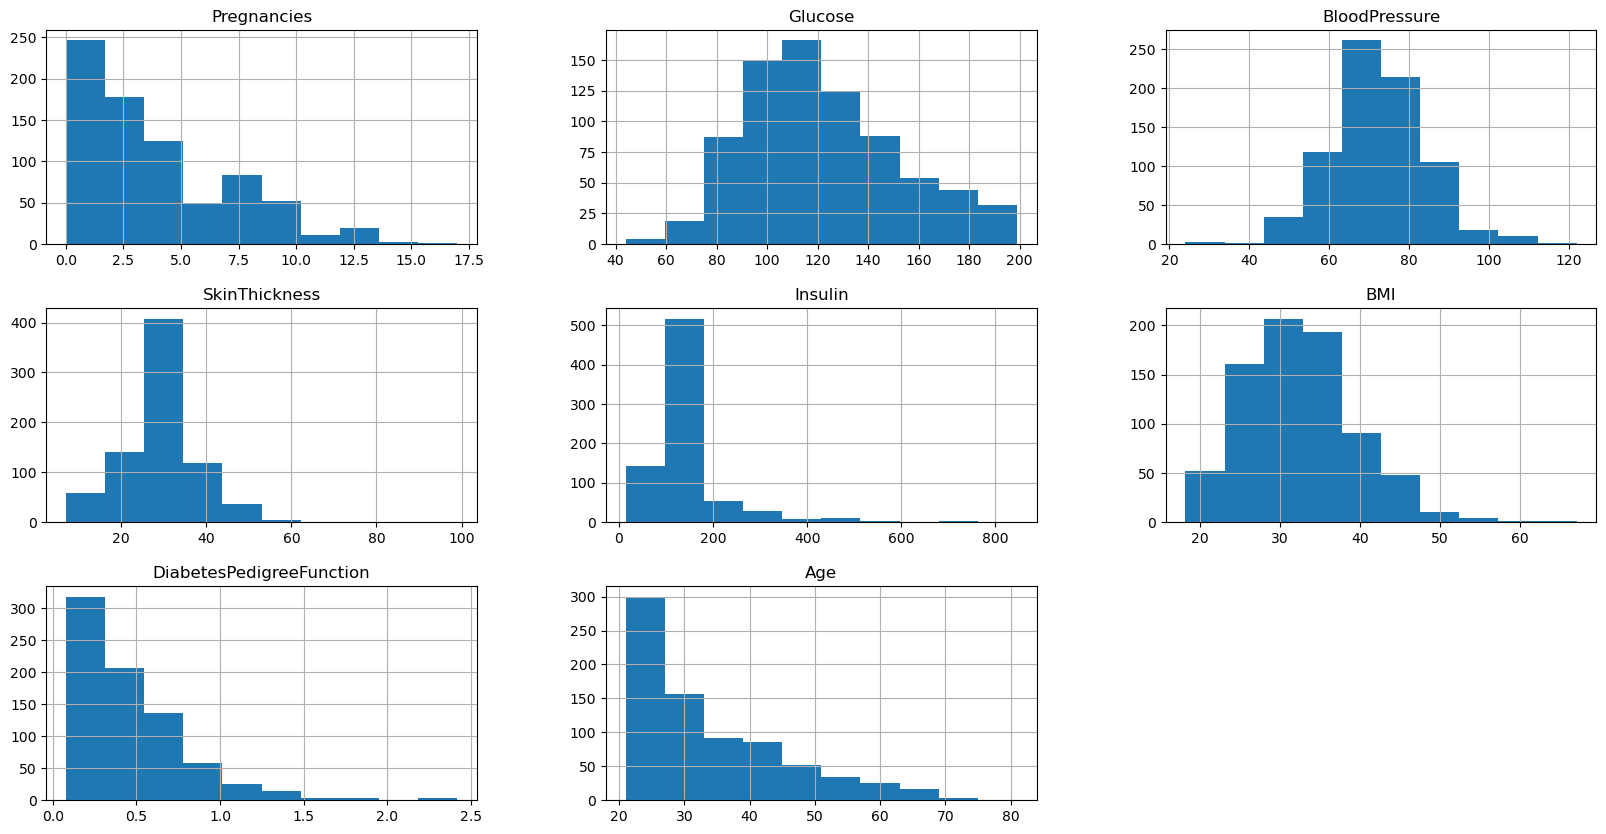

In [21]:
data.hist(figsize=(20,10))

From the above plots, we can infer that some of the features are normally distributed while othersare not normal.  Also we can see that the range of features is varying across the dataset and normalisation is important if this data is being used for machine learning algorithms which have this requirement.

Let us also see the pair plot for our dataset to identify any relationships between the features.

### 1.3.2 Pairplot

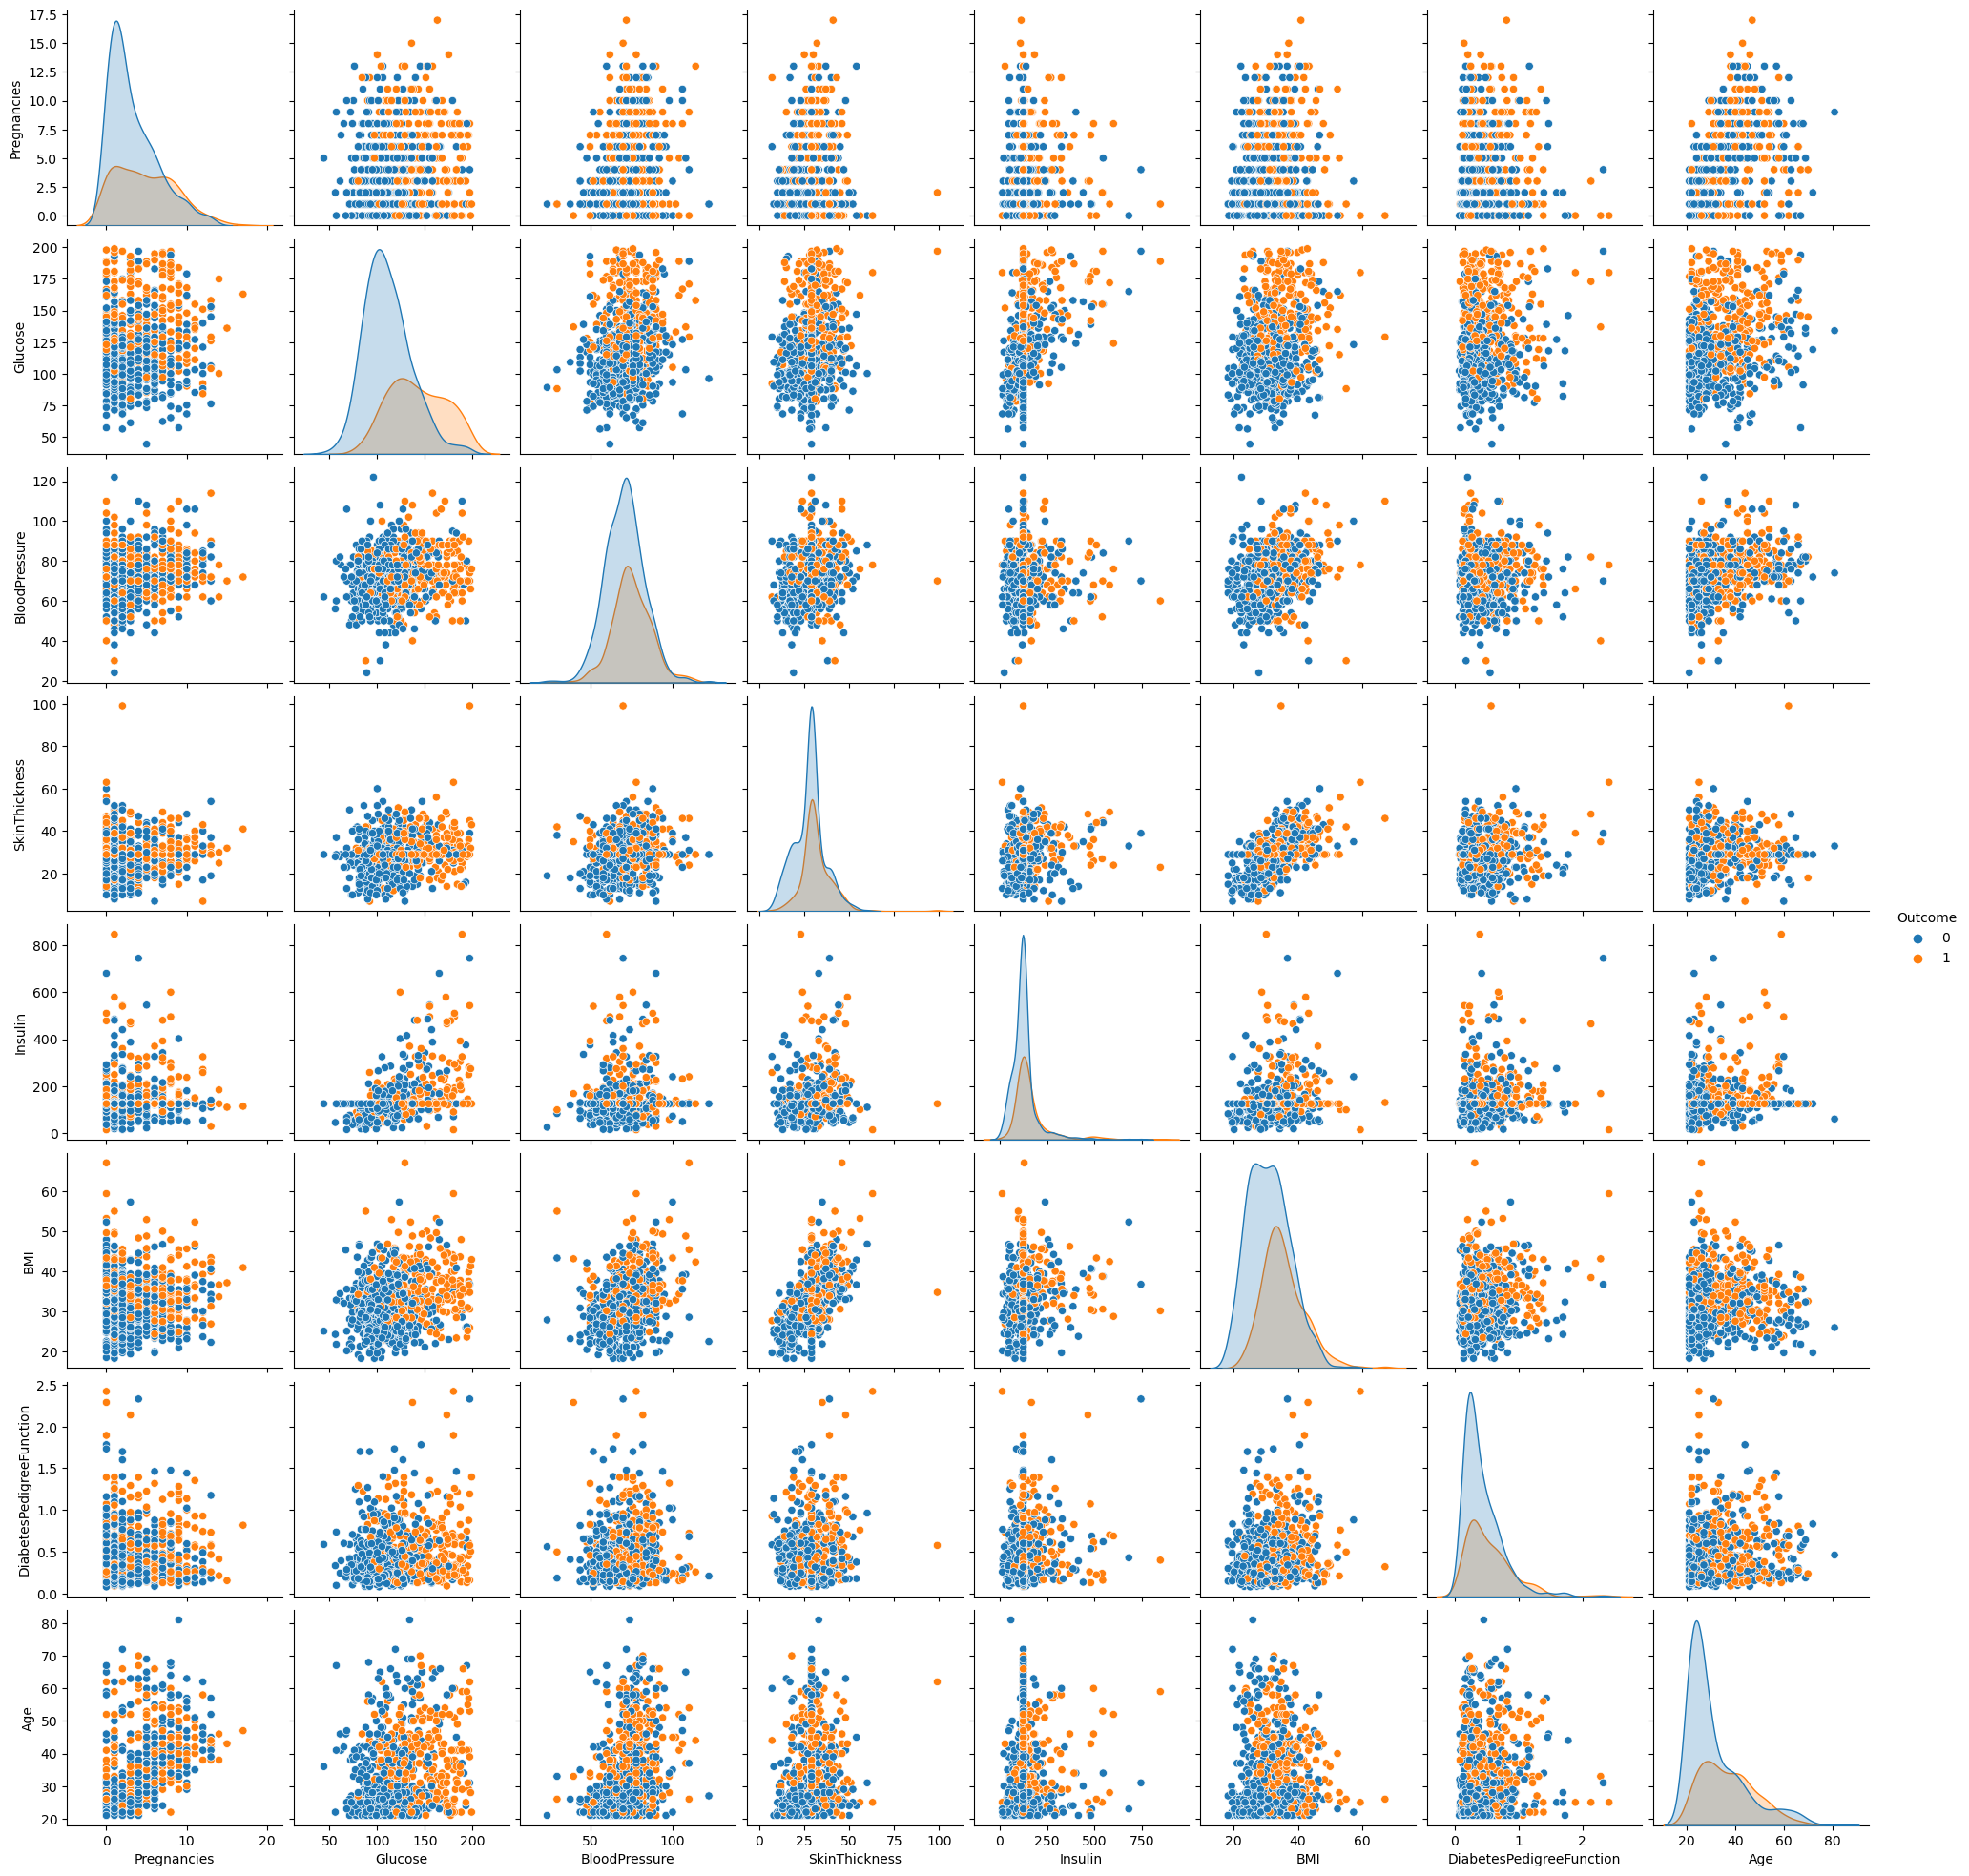

In [22]:
sns.pairplot(data,hue='Outcome')
plt.show()

None of the plots show a strong positive or negative relationship among the features.

### 1.3.3  Boxplot

To create a box plot, let us first create a subset of our dataset having only the numeric columns from data.

In [23]:
num_f=data.select_dtypes(include="number")
col_names=num_f.columns

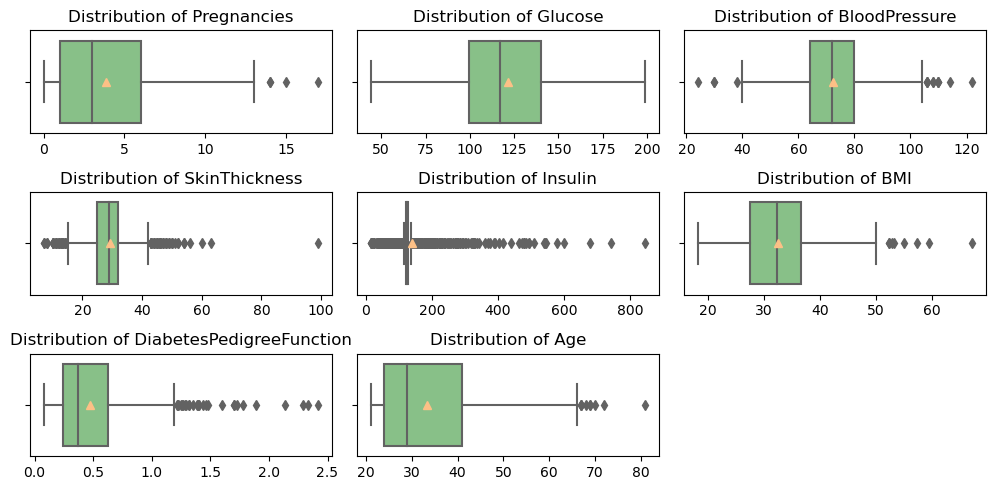

In [24]:
fig = plt.figure(1, (10,5))
sns.set_palette(sns.color_palette("Accent"))
for i,cont in enumerate(col_names):
    ax=plt.subplot(3,3,i+1)
    sns.boxplot(data=data,x=data[cont],showmeans=True)
    ax.set_title(f"Distribution of {cont}")
    ax.set_xlabel("")
plt.tight_layout()

From these plots, you can see the presence of outliers as well as the skewness in the data. The mean is represented by the yellow triangle. The difference between the mean and the median valueis an indicator of skewness. Skew can be better visualised using a violin plot.

### 1.3.4  Violin plot

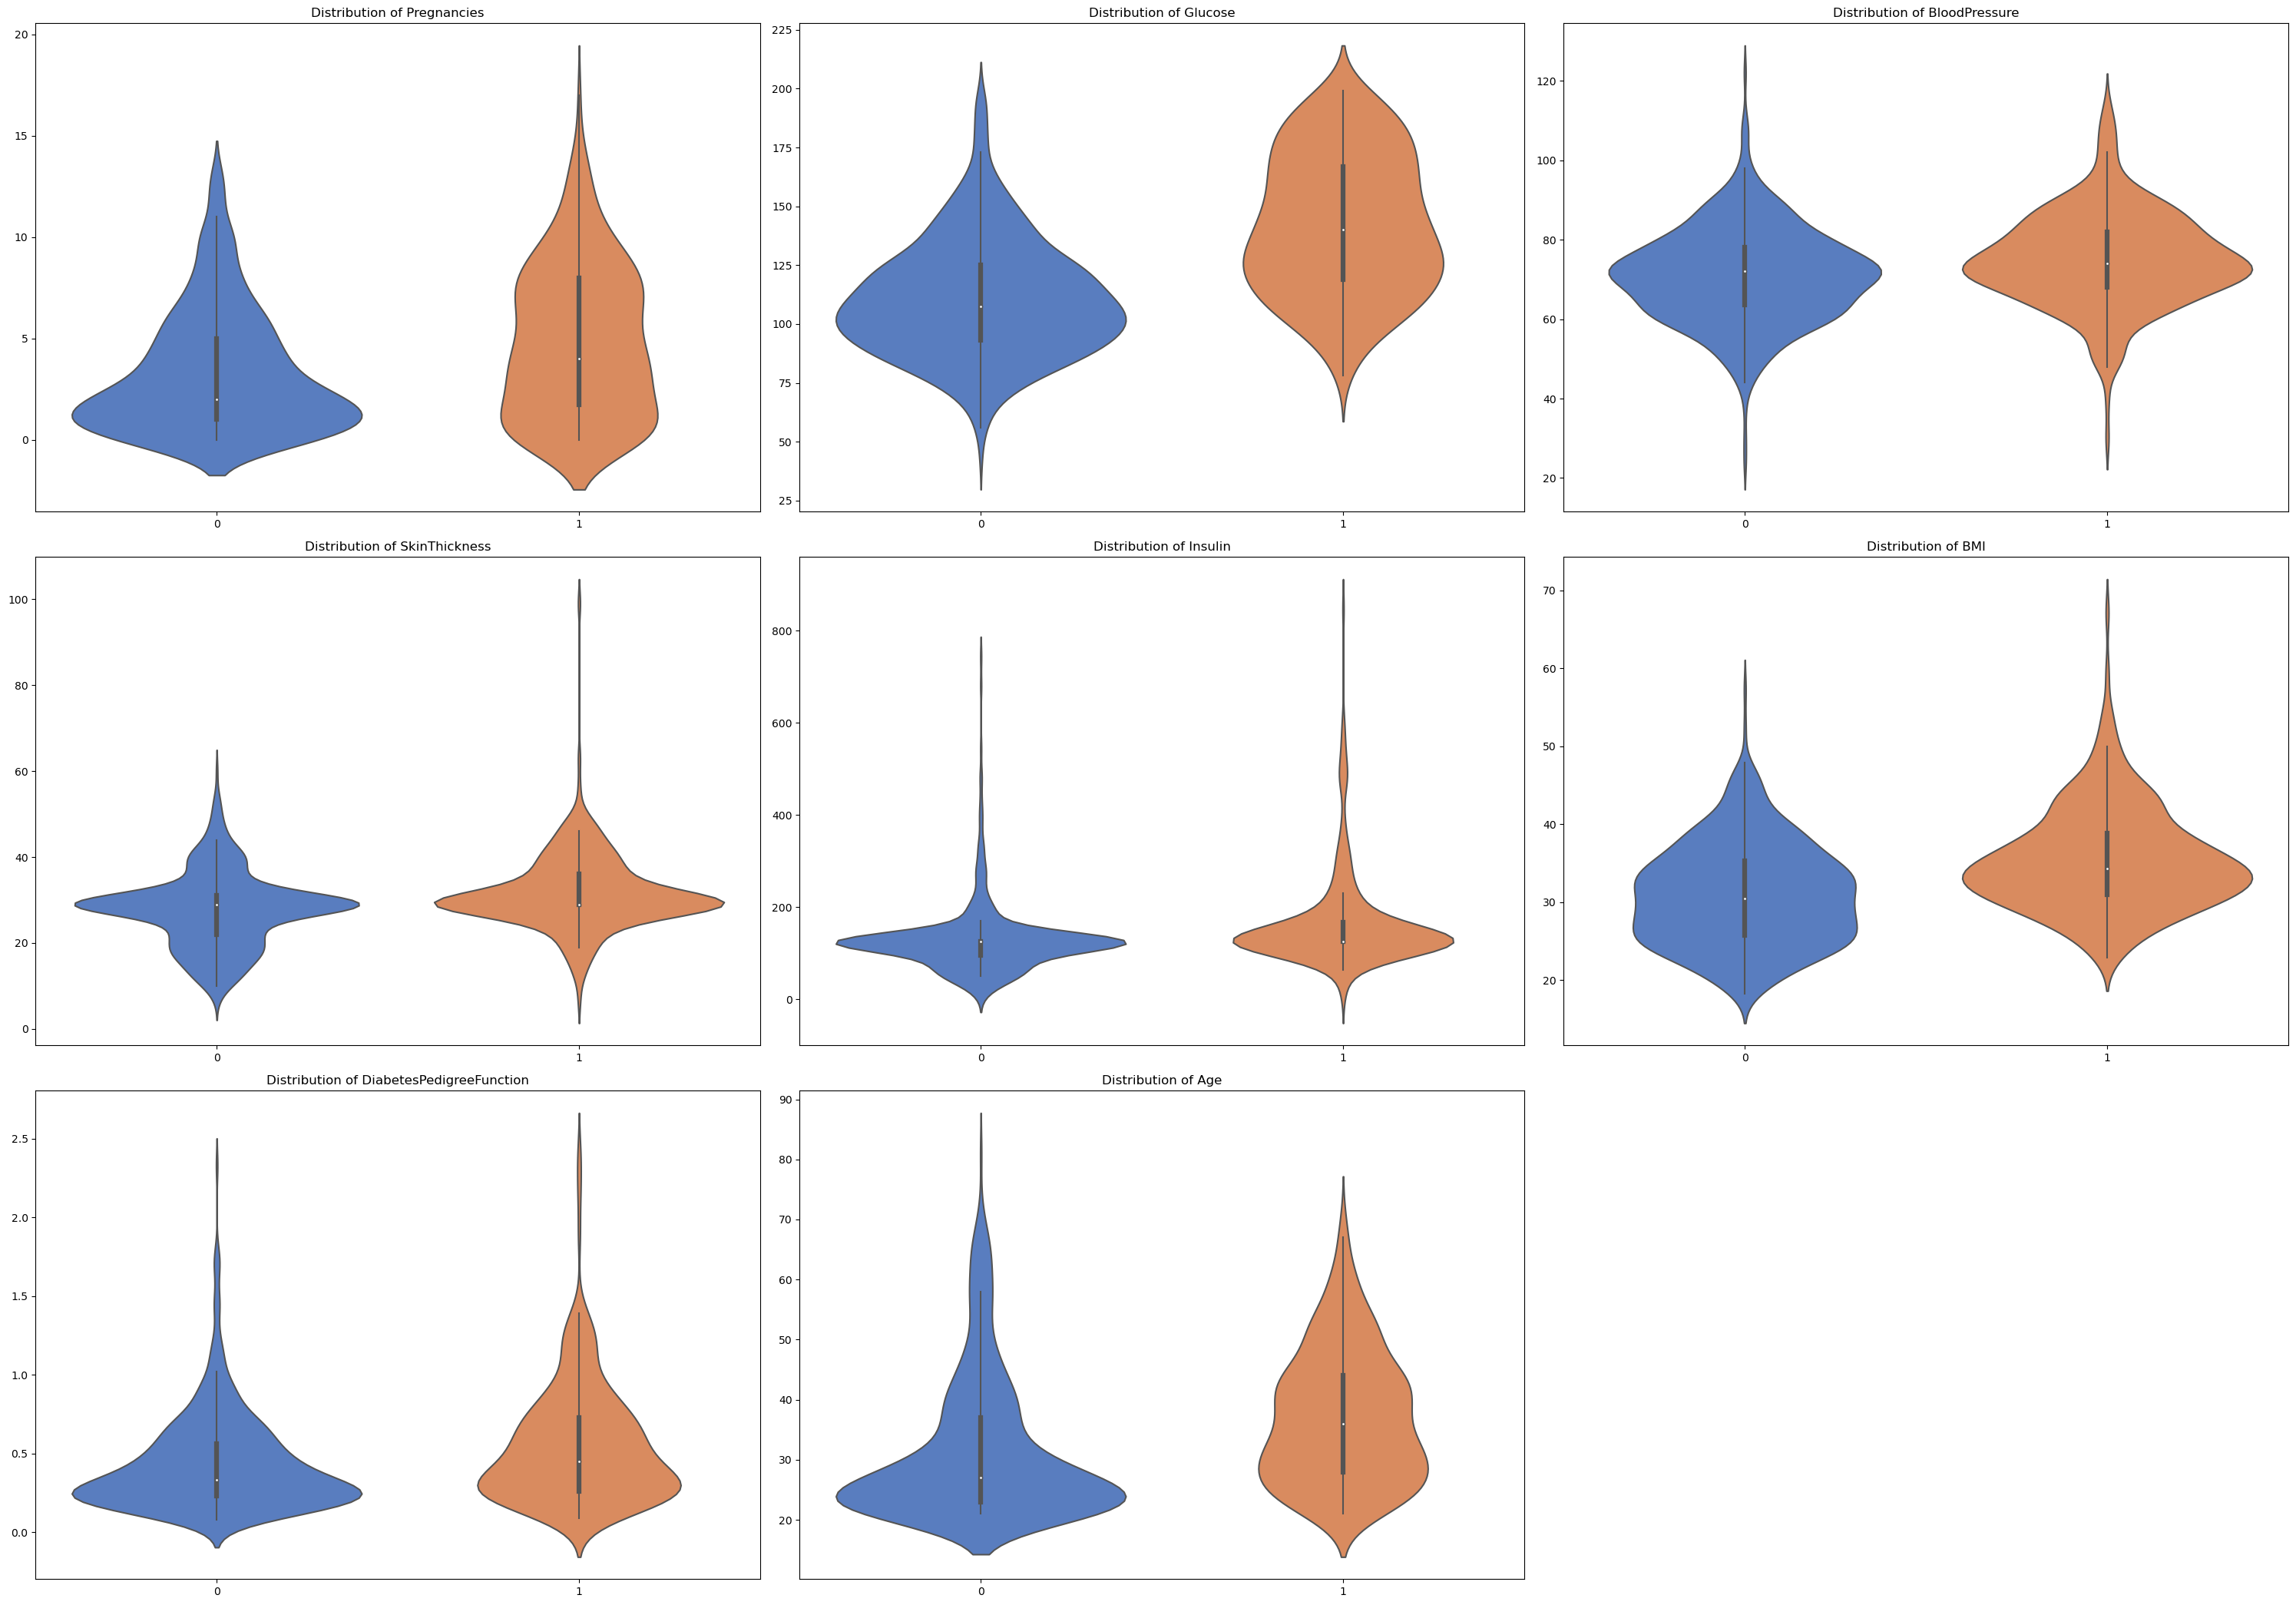

In [25]:
fig = plt.figure(1,(30,21))
sns.set_palette(sns.color_palette("Accent"))
for i,cont in enumerate(col_names):
    ax=plt.subplot(3,3,i+1)
    sns.violinplot(x="Outcome",y=cont, data=data, palette="muted",split=True)
    ax.set_title(f"Distribution of {cont}")
    ax.set_xlabel("")
    ax.set_ylabel("")
plt.tight_layout()

The yellow dot in the center of each plot is its mean value. From these plots, you can find out 2 things:

1) The degree of skewness in each plot

2) Which factors may have an impact on diabetes

Also, long tails for the plot for Insulin suggests the presence of outliers.

A clearer representation for the same can be as shown below:

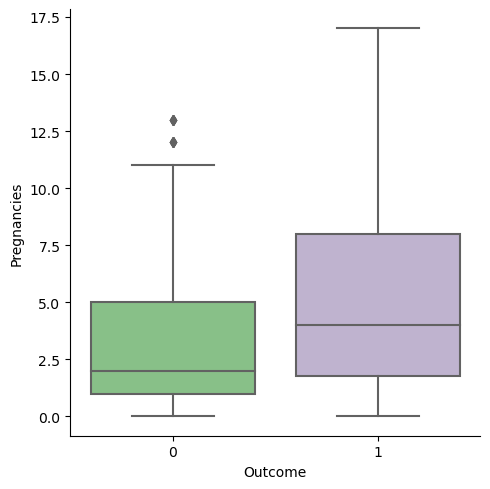

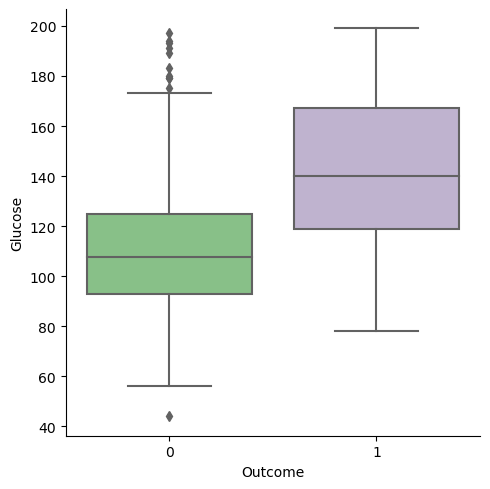

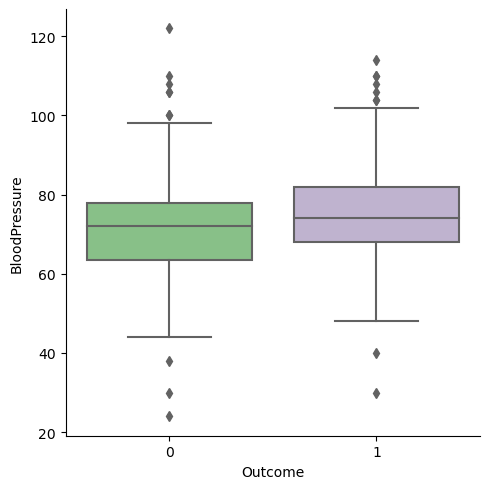

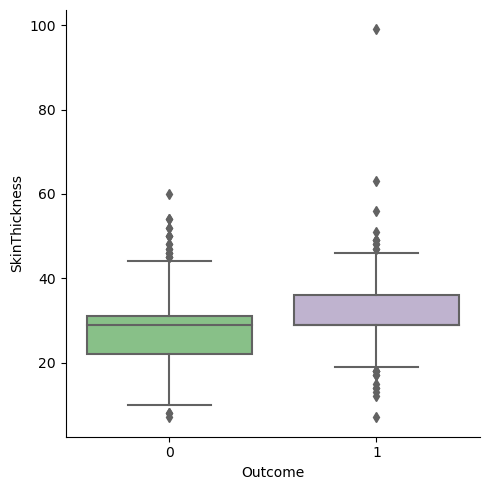

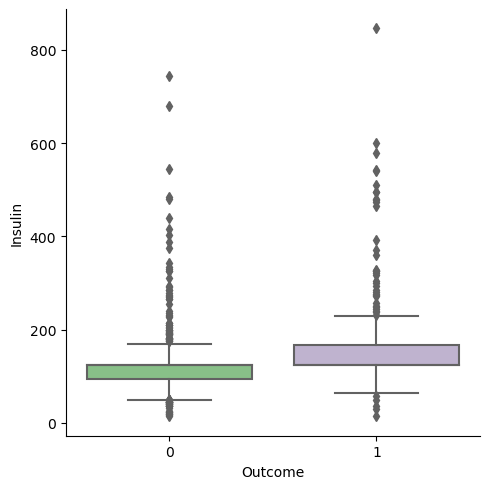

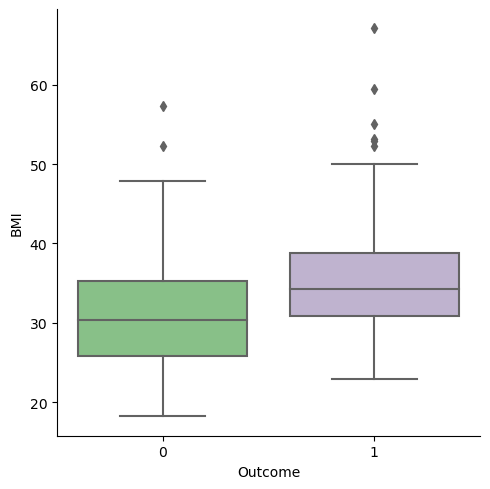

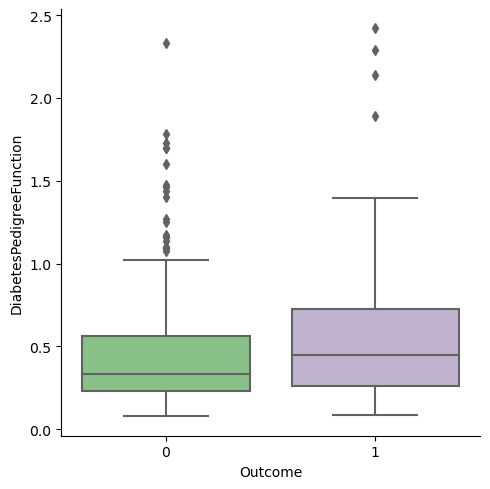

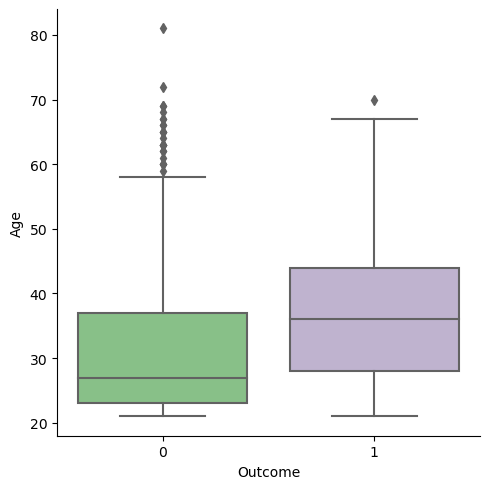

In [26]:
for i,col in enumerate(data.columns[:-1]):
    sns.catplot(x="Outcome",y=col,data=data,kind="box")
plt.show()

In [27]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Look at the plot for Glucose. If we observe minutely, we can see that the mean for 1 (Diabetic) is greater than the mean for 0 (Non Diabetic). It can be concluded that people who are diabetichave a higher Glucose level. Similar thought can be applied to BMI where Diabetic people have ahigher average BMI than non-diabetic people, suggesting that diabetes may be related to a higherbody weight. Similar trend can be seen in the Age column.

### 1.3.5  Outlier Treatment

The Pregnancies column has a maximum value of 17 which is an outlier. This outlier may be due to error in the data and hence we can clip it to its median value. Let us see what are the other values for this column using a count plot.

<Axes: xlabel='Pregnancies', ylabel='count'>

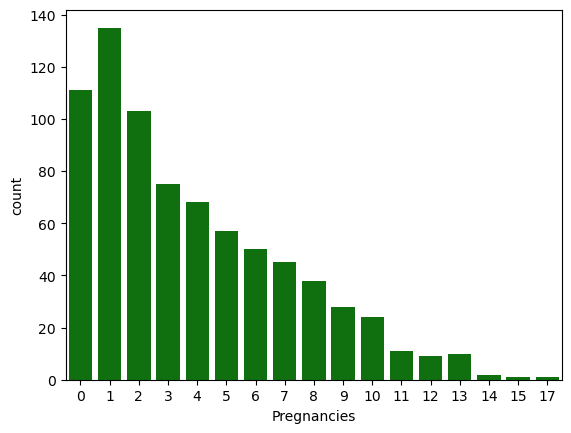

In [28]:
sns.countplot(x="Pregnancies",data=data,color="green")

There are outliers present in this column as can be seen from the plot. Other column also has outliers.  We can replace these outliers by their median values for the columns:  Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin and BMI. To identify outliers, we are using the formula **Q3 + 1.5*IQR**, and then replacing any data above this value with the median value for the given column.

In [29]:
Q1=data.quantile(0.25, numeric_only=True)
Q2=data.quantile(0.75, numeric_only=True)
Q3=data.quantile(0.5, numeric_only=True)
IQR= Q2-Q1
Maximum= Q3+1.5*IQR
Maximum

Pregnancies                  10.50000
Glucose                     177.75000
BloodPressure                96.00000
SkinThickness                39.50000
Insulin                     133.62500
BMI                          45.95000
DiabetesPedigreeFunction      0.94625
Age                          54.50000
dtype: float64

In [31]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    data.loc[data[col] > Maximum[col], col] = data[col].median()

The data no longer has any outliers. We can now proceed to normalise the data.

## 1.4  Normalisation

We have already seen the distribution of our data several times. Some of the features follow anormal distribution while few features do not. As a standard practice, we will standardise all thefeatures in the dataset so that they have a mean of 0 and standard deviation of 1. The last column Outcome is excluded since it is a dependent variable.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=pd.DataFrame(scaler.fit_transform(data.iloc[: , :-1]),
                    columns=data.columns[:-1])

In [34]:
scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.911204,1.259782,0.040727,1.264585,0.482831,0.290175,0.468492,1.425995
1,-0.863148,-1.291953,-0.512868,0.287849,0.482831,-0.882390,-0.365061,-0.190672
2,1.620945,0.004166,-0.697399,0.287849,0.482831,-1.435170,0.604397,-0.105584
3,-0.863148,-1.129938,-0.512868,-0.688887,-0.742282,-0.631126,-0.920763,-1.041549
4,-1.218019,0.814241,-2.911776,1.264585,0.482831,1.881513,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,2.330686,-0.643893,0.409790,0.287849,0.482831,0.172918,-0.908682,2.532136
764,-0.508278,0.206685,-0.143805,-0.037730,0.482831,0.826204,-0.398282,-0.531023
765,0.556333,0.166181,0.040727,-0.688887,-0.030926,-0.949394,-0.685193,-0.275760
766,-0.863148,0.368700,-1.066462,0.287849,0.482831,-0.296107,-0.371101,1.170732


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

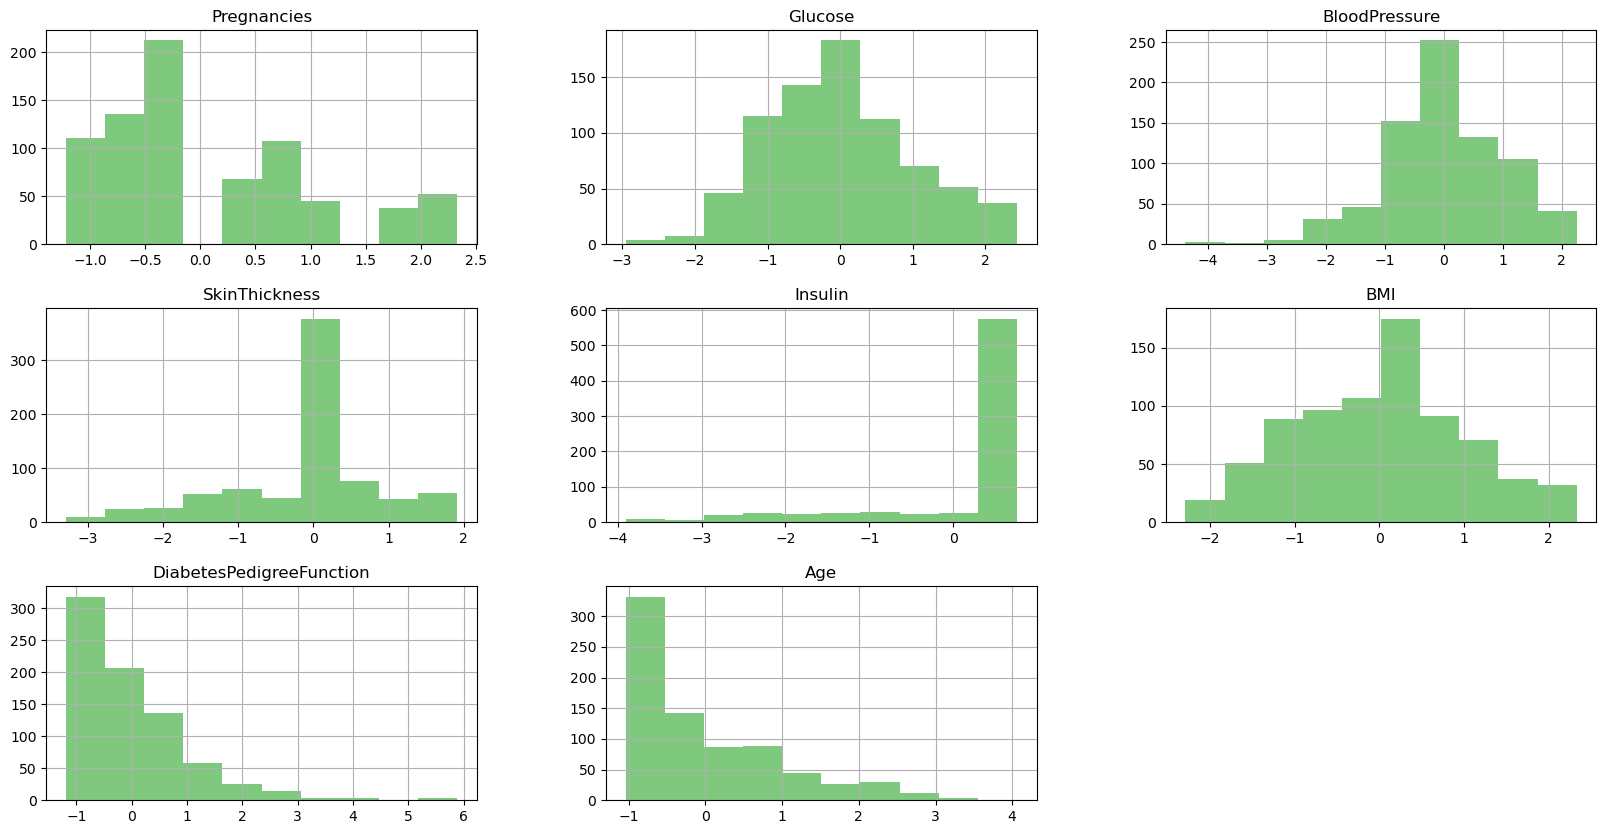

In [35]:
scaled.hist(figsize=(20,10))

All the columns now have a similar range of values. With this, we have finished with data processingand visualisation. We now have a clean dataset which is ready to be used for further applications.